# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

vehicles = pd.read_csv('/datasets/vehicles_us.csv')
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


We need to know how many rows and columns we are going to be dealing with in this study

In [2]:
vehicles.shape

(51525, 13)

 we need to find out what type of date types we have and what we need to concert to the appropriate type needed for our study

In [3]:
vehicles.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

So we have a table with 51525 rows and 13 columns mixed with string data type and integers which we will need to convert later

### Step 2. Data preprocessing

Let's see how many null values we have and where we have them. 

In [2]:
vehicles.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [3]:
vehicles.duplicated().sum()

0

the 'is_4wd' column only has a boolean value of 1 which also means "Yes" - we can safely assumne that the value missing is 0 or "No".
Let's replace the missing value by 0 or "No" 

In [4]:
vehicles['is_4wd'].fillna(0, inplace=True)

In [5]:
'''
let's use a traditional approach on replacing the missing values:
- the 'odometer' missing values will be replaced by the median value of the total odometer readings
- the 'cylinders' missing values will be replaced by number 0  
- the 'model_year' missing values will be replaced by number 0 - 
- the 'paint_color' missing values will be replaced by 'unknown' - can't model a replacement
'''


vehicles['odometer'].fillna(value = vehicles['odometer'].median(), inplace = True)
vehicles['cylinders'].fillna(value = 0, inplace=True)
vehicles['model_year'].fillna(value = 0, inplace = True)
vehicles['paint_color'].fillna(value='Unknown', inplace=True)

Let's make sure that the missing values have been replaced.

In [8]:
print(vehicles.head(10))

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         0.0      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas  113000.0   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.0   
9   9200      2008.0     honda pilot  excellent        0.0  gas  147191.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV     Unknown     1.0  2018-06-23           19  
1    automat

In [9]:
vehicles.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

There is no logical explanation as of why the data is missing in this case,this information should be default for ALL cars.
We need to know how the csv file was generated. Was it through scraping/parsing? because clearly someting did not work right in the code If a boolean value is missing



We need to convert 'model_year', 'cylinders', ' odometer', 'is_4wd','date_posted' from object to integers for calculations

In [6]:
for col in ['model_year', 'cylinders', 'odometer', 'is_4wd' ]:
    vehicles[col]= vehicles[col].astype(int)

<blockquote> After looking closely at the data, I can see that the data is NOT completely missing at random. The value "other" from the 'Transmission' column carries the most missing value across the other columns. 
    

The data missing on the "cylinders" column could be due to the fact that float was not set correctly, but some cars do have 4.2, 4.5...cylinders.
    
On Paint_color: it could be that a space was not allowed and perhaps they were entries for colors like : "light blue" or "Dark grey"
    
On Model Year: the entry format probably didn't match - could have been "yy" or else.
    
On Odometer: Excellent cars with missing values could just be that the meter is a 0000000 and somehow was not accepted. 
</blockquote>

we need to convert 'date_posted' to pandas to_datetime for calculations
Extract 'day', 'week' and 'year' from datetime using datetime accessor for further calculations

In [7]:
vehicles['date_posted']=pd.to_datetime(vehicles['date_posted'])

vehicles['day']=vehicles['date_posted'].dt.dayofweek
vehicles['week']=vehicles['date_posted'].dt.week
vehicles['year']=vehicles['date_posted'].dt.year

We will create 3 new columns here for Year, week  and day after extracting it from the date_posted column

In [9]:
print(vehicles[['day','week','year']])

       day  week  year
0        5    25  2018
1        4    42  2018
2        3     6  2019
3        4    12  2019
4        1    14  2019
...    ...   ...   ...
51520    2    40  2018
51521    2    46  2018
51522    3    46  2018
51523    0    27  2018
51524    1    23  2018

[51525 rows x 3 columns]


### Step 3. Make calculations and add them to the table

 We are now ready to perform required calculations


In [10]:
vehicles['age_years']=vehicles['year'] - vehicles['model_year']
vehicles['avg_miles_year']=vehicles['odometer']/vehicles['age_years']
vehicles.replace([np.inf, -np.inf], np.nan, inplace=True)

In [10]:
vehicles.fillna(0, inplace=True)

In [15]:
print(vehicles.head(50))

    price  model_year                              model  condition  \
0    9400        2011                             bmw x5       good   
1   25500           0                         ford f-150       good   
2    5500        2013                     hyundai sonata   like new   
3    1500        2003                         ford f-150       fair   
4   14900        2017                       chrysler 200  excellent   
5   14990        2014                       chrysler 300  excellent   
6   12990        2015                       toyota camry  excellent   
7   15990        2013                        honda pilot  excellent   
8   11500        2012                        kia sorento  excellent   
9    9200        2008                        honda pilot  excellent   
10  19500        2011           chevrolet silverado 1500  excellent   
11   8990        2012                       honda accord  excellent   
12  18990        2012                           ram 1500  excellent   
13  16

Since we will need to perform calculations with the 'condition' columns, - we need to replace its values with integers

In [11]:
condition_dic= {'excellent':0,'new':1,'like new':2,'good':3,'fair':4,'salvage':5}

vehicles['condition'].replace(condition_dic, inplace=True)

In [12]:
condition_dic

{'excellent': 0, 'new': 1, 'like new': 2, 'good': 3, 'fair': 4, 'salvage': 5}

### Step 4. Carry out exploratory data analysis

### Let's Visualize the Data at the inital state

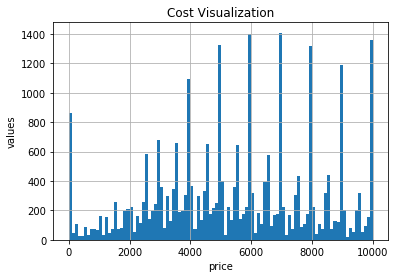

In [12]:
vehicles.hist('price', bins=100, range=(0,10000))
plt.title('Cost Visualization')
plt.xlabel('price')
plt.ylabel('values')

plt.show( )

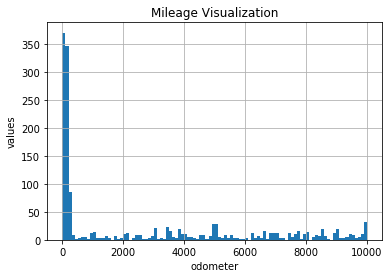

In [19]:
vehicles.hist('odometer', bins=100 , range=(0,10000))
plt.title('Mileage Visualization')
plt.xlabel('odometer')
plt.ylabel('values')

plt.show( )

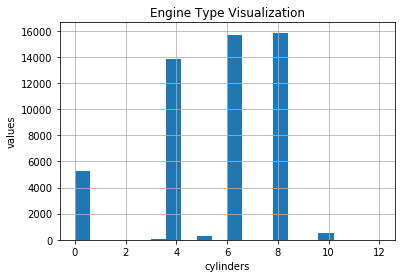

In [20]:
vehicles.hist('cylinders', bins=20)
plt.title('Engine Type Visualization')
plt.xlabel('cylinders')
plt.ylabel('values')

plt.show( )

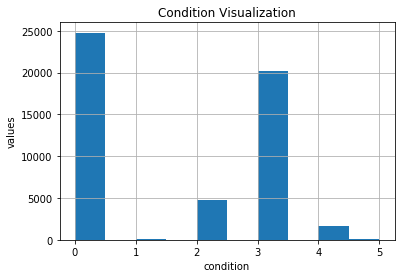

In [21]:
vehicles['condition'].value_counts()
vehicles.hist('condition', bins=10)
plt.title('Condition Visualization')
plt.xlabel('condition')
plt.ylabel('values')

plt.show( )

### Let's deal with outliers

we noticed that the price and odometer columns have a lot of outliers - we will remove them with the dotplot and interquantile

In [22]:
vehicles['price'].value_counts()

1         798
6995      719
5995      655
4995      624
3500      620
         ... 
49988       1
36600       1
300000      1
39873       1
11762       1
Name: price, Length: 3443, dtype: int64

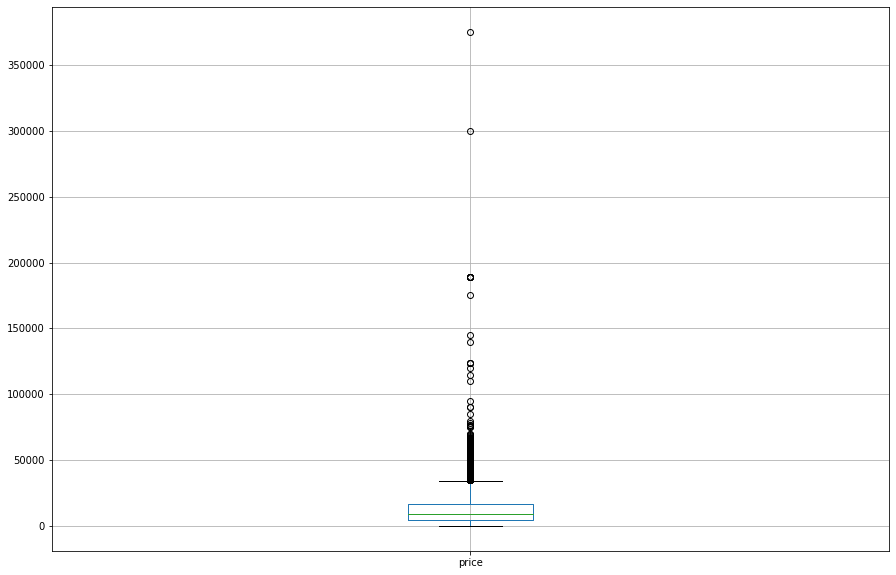

In [23]:
vehicles.boxplot(column='price', figsize=(15,10))
plt.show( )

 Based on this boxplot alone I can see that the valuable data is between 3000 and 100000

In [13]:
filtered_data_price= vehicles.query('3000<price<100000')

let's visualize the boxplot for that query

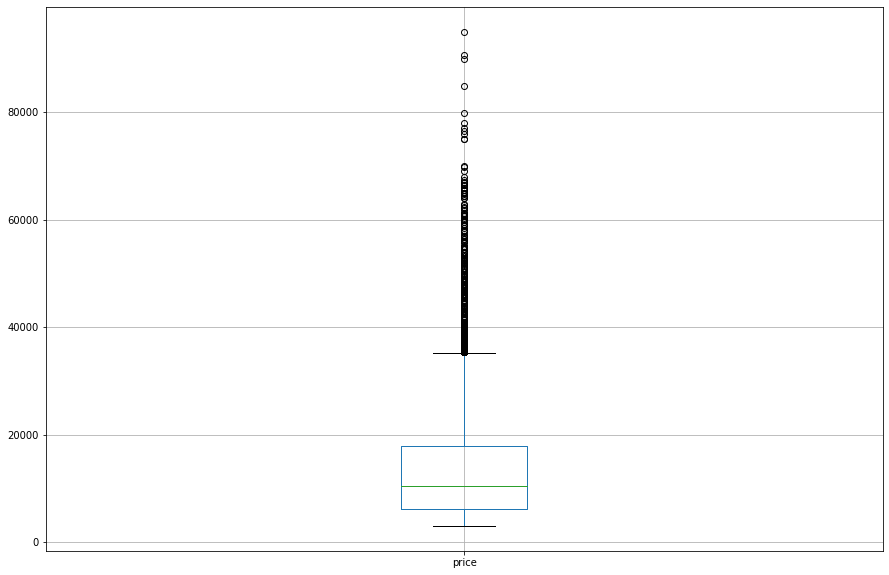

In [25]:
filtered_data_price.boxplot(column='price', figsize=(15,10))
plt.show( )

The 'odometer' column also has outliers - let's visualize that

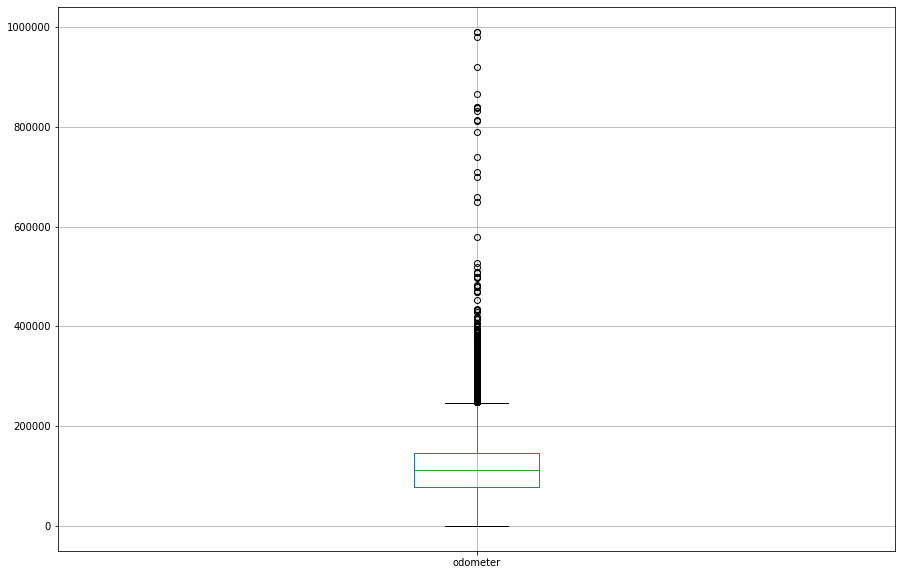

In [26]:
vehicles.boxplot(column='odometer', figsize=(15,10))
plt.show( )

we can eliminate the outliers with this query as a new table

In [14]:
filtered_data=vehicles.query('(3000<price<100000) and (0<odometer<600000)')

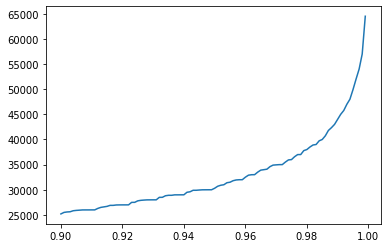

In [15]:
price_quantiles =[]
quantile_values =np.arange(0.9,1.0,0.001)

for q in quantile_values:
    price_quantiles.append(vehicles['price'].quantile(q))
    
plt.plot(quantile_values, price_quantiles)
plt.show( )

 Another method that could be used to determine which values are outliers is to determinate the Outliers values
 Instead of just looking at the values we can use the .quantile() method to find them

In [29]:
vehicles[['price','odometer']].quantile(0.98)
iqr =vehicles['price'].quantile(.75) - vehicles['price'].quantile(.25)
low = vehicles['price'].quantile(.25) - iqr*1.5
up = vehicles['price'].quantile(.75) + iqr*1.5

print('Inter-Qaurtile Range: {}'.format(iqr))
print('Lower bound: {}'.format(low))
print('upper bound: {}'.format(up))

Inter-Qaurtile Range: 11839.0
Lower bound: -12758.5
upper bound: 34597.5


 To better compare the data without printing individual graphs, let's print the scatter matrix with the outliers 

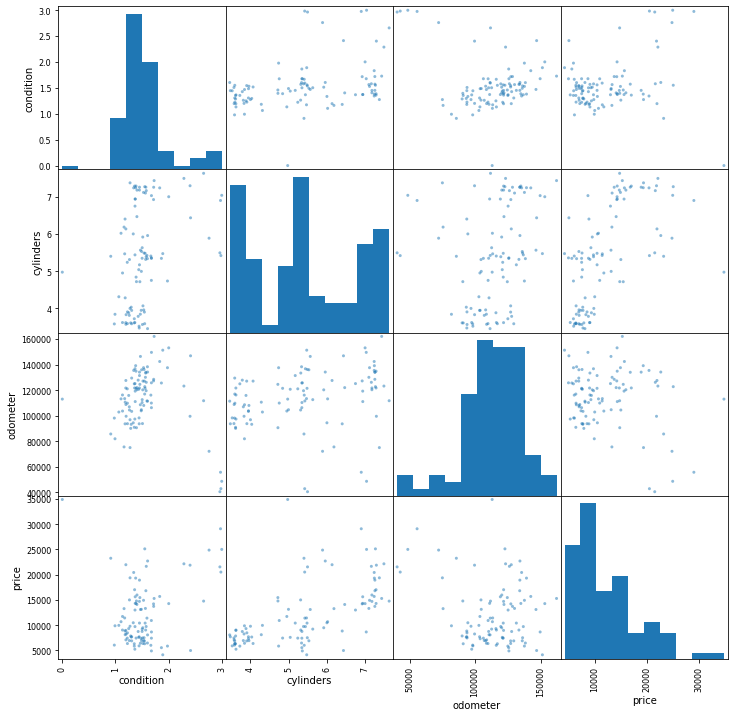

In [30]:
vehicles_main= vehicles.pivot_table(index='model' , values=['price', 'odometer', 'cylinders', 'condition'])

pd.plotting.scatter_matrix(vehicles_main, figsize=(12, 12))
plt.show( )

 Now, let's print the scatter matrix without the outliers 

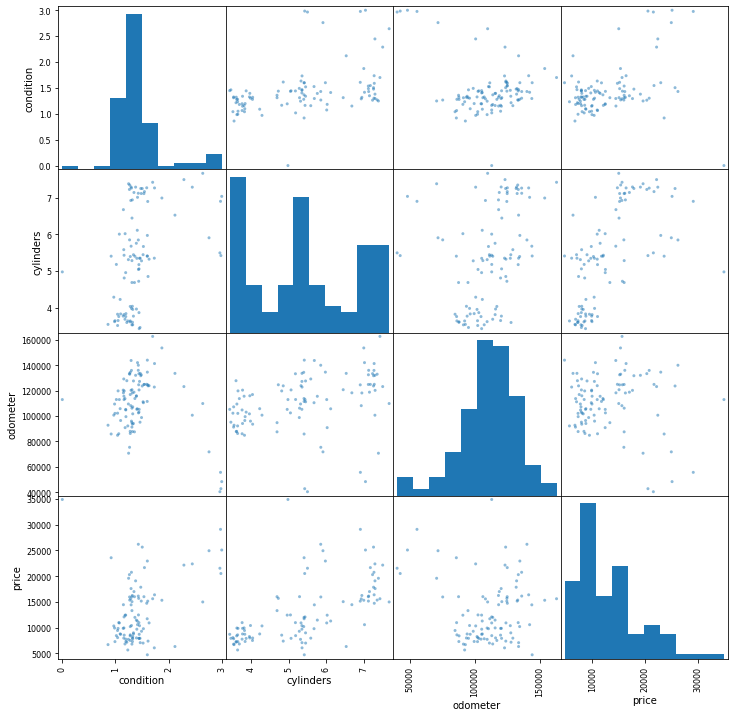

In [31]:
vehicles_filtered= filtered_data.pivot_table(index='model' , values=['price', 'odometer', 'cylinders', 'condition'])

pd.plotting.scatter_matrix(vehicles_filtered, figsize=(12, 12))
plt.show( )

 We can clearly see the difference with and without outliers (with the same output parameters).
The data on the last scatter matrix show the data points more clearly centered in each box for a fair analysis

<blockquote> After removing the outliers, we can see that there is not a huge difference between the graphs or the mean/median ( printed below).This is still a right skewed histogram .However, there is a difference on the price/price box - on the 'vehicles_main' graph the price/price box - has a significant gap between values - and on the 'vehicles_filtered' there is no gap.  </blockquote>

In [32]:
vehicles_main.describe()

,condition,cylinders,odometer,price
count,100.000000,100.000000,100.000000,100.000000
mean,1.530841,5.406485,113924.574046,12074.780669
std,0.456678,1.344572,22587.629932,6123.507760
min,0.000000,3.456000,40435.426087,4143.698039
25%,1.293885,3.957160,103257.546267,7454.811060
50%,1.452189,5.396566,116596.335774,9842.173539
75%,1.594953,6.910319,127660.973650,14950.961941
max,3.000000,7.635135,162135.821138,34900.000000


In [33]:
vehicles_filtered.describe()

,condition,cylinders,odometer,price
count,100.000000,100.000000,100.000000,100.000000
mean,1.438224,5.385050,110833.452391,12976.511848
std,0.465982,1.348692,22160.550463,5959.763540
min,0.000000,3.424779,40435.426087,4744.094737
25%,1.209660,3.957562,99368.359145,8235.035737
50%,1.331753,5.373290,112996.255769,10961.983319
75%,1.494115,6.901645,124895.168537,16022.413706
max,3.000000,7.670103,162744.433333,34900.000000


In [34]:
vehicles['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

In [35]:
vehicles_filtered.describe()

,condition,cylinders,odometer,price
count,100.000000,100.000000,100.000000,100.000000
mean,1.438224,5.385050,110833.452391,12976.511848
std,0.465982,1.348692,22160.550463,5959.763540
min,0.000000,3.424779,40435.426087,4744.094737
25%,1.209660,3.957562,99368.359145,8235.035737
50%,1.331753,5.373290,112996.255769,10961.983319
75%,1.494115,6.901645,124895.168537,16022.413706
max,3.000000,7.670103,162744.433333,34900.000000


In [89]:
filtered_data.pivot_table(index='model', values='price', aggfunc=['count','mean','median'])

,count,mean,median
,price,price,price
model,,,
acura tl,206,7099.043689,6050.0
bmw x5,260,10928.665385,9900.0
buick enclave,253,12095.304348,10900.0
cadillac escalade,310,17602.174194,14495.0
chevrolet camaro,335,15971.143284,14750.0
...,...,...,...
toyota sienna,276,10395.670290,6995.0
toyota tacoma,812,15698.700739,13995.0


Let's find the cars with fewer days on the site

In [41]:
selling=filtered_data.groupby('model')['days_listed'].count().sort_values()
print(selling.head(10))

model
mercedes-benz benze sprinter 2500     41
ford taurus                          148
dodge dakota                         167
chevrolet trailblazer                190
acura tl                             206
jeep grand cherokee laredo           211
nissan maxima                        216
honda civic lx                       217
nissan murano                        223
hyundai santa fe                     225
Name: days_listed, dtype: int64


Now - Let's find the cars that have been on the site the longest - Not selling fast

In [18]:
print(selling.tail(10))

model
toyota camry                   803
toyota tacoma                  812
gmc sierra 1500                841
chevrolet silverado 2500hd     897
jeep wrangler                 1038
ram 2500                      1058
chevrolet silverado           1179
ram 1500                      1591
chevrolet silverado 1500      2058
ford f-150                    2511
Name: days_listed, dtype: int64


No surprised The trucks are NOT selling fast they are also the most expensive type of cars 

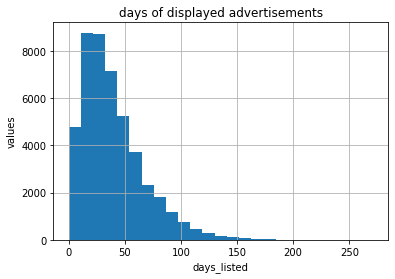

In [40]:
filtered_data.hist('days_listed', bins=25)
plt.title('days of displayed advertisements')
plt.xlabel('days_listed')
plt.ylabel('values')
plt.show()

The ads listed less than 50 days are the more common 

<blockquote> Adding 'ads lifetime' analysis ( for the next 4 rows) </blockquote> </br>

In [51]:
vehicles['ads_lifetime']= vehicles.days_listed- vehicles.day
print(ads_lifetime.head(10))

0    14
1    46
2    76
3     5
4    27
5    13
6    70
7    68
8    19
9    13
dtype: int64


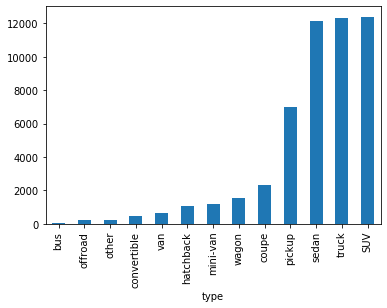

In [57]:
vehicles.groupby('type')['ads_lifetime'].count().sort_values().plot(kind='bar')
plt.show( )

SUV and Trucks have the most ads on the site. This is normal because they are the dominant types.

Now let's deternime which ads have the shortest lifetime ( less than 25 days)  based on models

In [82]:
vehicles.query('ads_lifetime <= 25').pivot_table(index='model',values = ['ads_lifetime'], aggfunc='count').sort_values(by=['ads_lifetime'])

,ads_lifetime
model,
mercedes-benz benze sprinter 2500,15
kia sorento,87
ford f-250 super duty,100
nissan murano,101
jeep grand cherokee laredo,102
...,...
jeep wrangler,485
chevrolet silverado,518
ram 1500,739


We can also deternime  which ads stay the longest on the site ( for more than 100 days) based on models

In [81]:
vehicles.query('ads_lifetime >= 100').pivot_table(index='model',values = ['ads_lifetime'], aggfunc='count').sort_values(by=['ads_lifetime'])

,ads_lifetime
model,
dodge dakota,2
hyundai santa fe,4
jeep grand cherokee laredo,4
nissan maxima,5
toyota camry le,6
...,...
jeep wrangler,43
chevrolet silverado,52
ram 1500,65


### More Data Study  - Without The Outliers

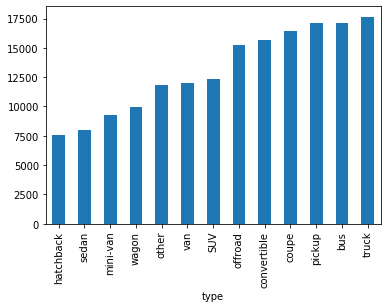

In [40]:
filtered_data.groupby('type')['price'].mean().sort_values().plot(kind='bar')
plt.show( )


 we can see from the graph that the Trucks and Vans are the most expensive.

 Counting the number ads for each vehicle type 

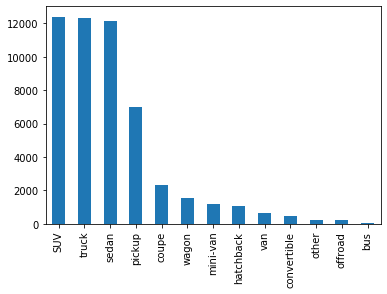

In [42]:
vehicles['type'].value_counts().plot( kind='bar')
plt.show( )

Trucks ,SUVs, and Sedans have the most numbers of ads

<blockquote> Explaining why SUV and Trucks are the two most popular type of vehicles (3 possible explanation)
        </blockquote> </br>

Also

<blockquote>  scatterplots axes switch
        </blockquote> </br>

One explanation might just be that they are the most expansive types.

In [39]:
filtered_data.groupby('type')['price'].count().sort_values()

type
bus               24
offroad          199
other            232
convertible      404
van              543
hatchback        912
mini-van         979
wagon           1367
coupe           1963
pickup          6457
sedan          10046
SUV            11014
truck          11483
Name: price, dtype: int64

The other explanation could be that SUVs and Trucks are the vehicles with the most excellent condition and have been on the site for less than 30 days

In [87]:
filtered_data.query('(condition==0) and (0<days_listed<30)').pivot_table(index='type', values='price', aggfunc='count').sort_values(by=['price'])

,price
type,
bus,1
other,39
offroad,53
van,79
convertible,104
hatchback,209
mini-van,248
wagon,293
coupe,312


Or Perhaps the people in this particular town just prefer Trucs and SUVs and the dealership makes sure they are always in stock.


 Let's study how the price is affected by different variables

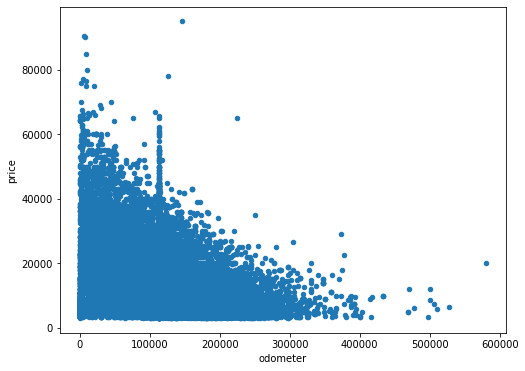

In [20]:
filtered_data.plot(x='odometer', y='price', kind='scatter',  figsize=(8, 6), grid=False)
plt.show()

It obvious that cars with low milage are the most expensive.But the data also shows the majority of cars fall into this category
cars between 0- 250000 miles cost less than $20000

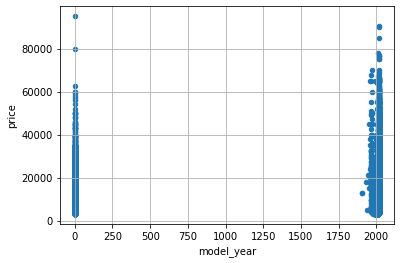

In [21]:
filtered_data.plot( x='model_year', y='price', kind='scatter',grid=True)
plt.show()

It is also very clear that most recent cars at the most expensive. 
However, there is a huge block of data showing cars aged 2000-2020 costing less than $20000 - there are clearly other factors affecting the price in this case.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


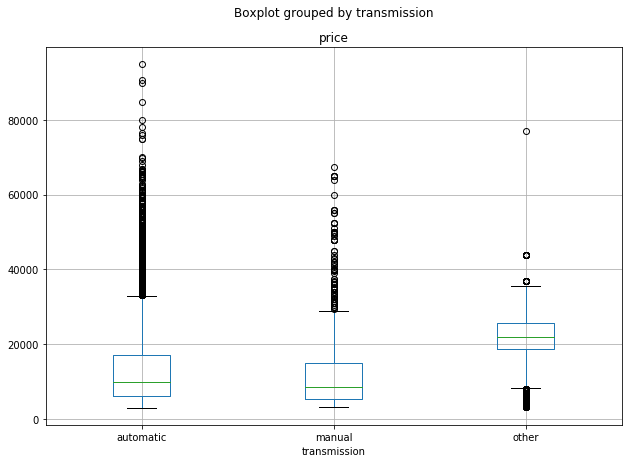

In [45]:
filtered_data.boxplot(by='transmission', column='price', figsize =(10,7))
plt.show( )

Manual transmission tend to be less expensive than the automatic counterpart

How about the relationship between Paint Color and the price ?

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


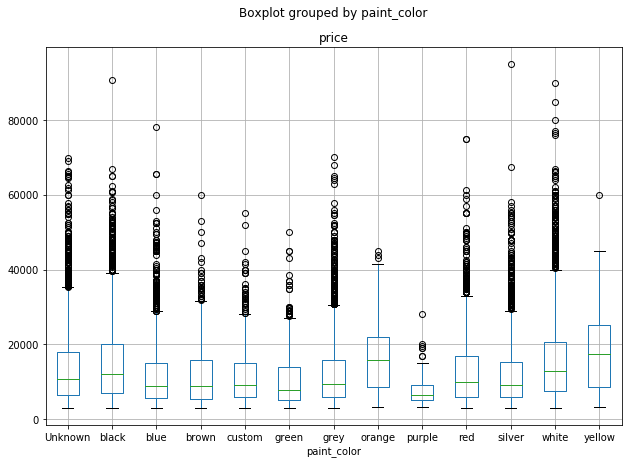

In [47]:
filtered_data.boxplot(by='paint_color', column='price', figsize =(10,7))
plt.show( )

White,Black, Gray, and Silver are the most expensive

 Step 5. Overall conclusion


The research on sales car Ads is full of options, but in order to really come up with different scenarios on how to manipulate 
that data rest of the fact that outliers have to be elimanated.It is just too much of a gap to ignore. 

I was able to see which cars cost the most, which cars sell the least based on the number of days since they were up for sale
I also able to see what category of cars people are incline to purchase. 
The cars on this dataset were up for sale for 1 year (2018-2019)so I didn't use the breakdown of the date_posted a lot just days_listed

I know there is still more I could do with this data set with the power of pivot table and the variety of Grpah we can come up with.


<blockquote>Expanding final conclusion</blockquote>

The missing values in the data are not completely random, most of them are attached to value "other" in the "transmission" column. That value was not dropped all together because transmission is not a significant variable but the values attached to it are still important.

The job was to study the data collected over the last few years and determine which factors influence the price of a vehicle.

This is what I found: 
    
<ul>
<li>Trucks have been on the site the longest ( not selling fast) -makes sense since they are also very expensive</li>
<li>trucks, buses ,and pickups are overall the most expensive vehicle types</li>
<li>The ads listed less than 50 days are the more common</li>
<li>Trucks ,SUVs, and Sedans have the most numbers of ads</li>
<li>The data shows the majority of cars fall into the category between 0- 250000 miles that cost less than 20000</li>
<li>There is a huge block of data showing cars aged 2000-2020 costing less than 20000</li>
<li>Manual transmission tend to be less expensive</li>
<li>White,Black, Gray, and Silver are the most expensive</li>
</ul>

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn